In [1]:
#import the libraries
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [1]:
#Makeing image directory
test_directory = "D:/Sem-6/Predictive Analysis/data/test"
train_directory = "D:/Sem-6/Predictive Analysis/data/train"

In [3]:
def create_dataframe(directory):
    image_paths = []
    labels = []
    
    # Assuming the directory structure is: directory/class_name/image.jpg
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image_paths.append(image_path)
                labels.append(class_name)
    
    return image_paths, labels

In [6]:
# Define the directories containing the training and testing images
train_directory = 'Task Optimizer/data/train'  # Replace with the actual path
test_directory = 'Task Optimizer/data/test'    # Replace with the actual path

# Create the training DataFrame
train = pd.DataFrame()
train['image_path'], train['label'] = create_dataframe(train_directory)
print("TRAINING DATAFRAME CREATED!")
print("---------------------------------------------------")

# Create the testing DataFrame
test = pd.DataFrame()
test['image_path'], test['label'] = create_dataframe(test_directory)
print("TESTING DATAFRAME CREATED!")

TRAINING DATAFRAME CREATED!
---------------------------------------------------
TESTING DATAFRAME CREATED!


In [6]:
#check 
print(train)
print("---------------------------------------------------")
print(test)

                                        image_path     label
0            Task Optimizer/data/train\angry\0.jpg     angry
1            Task Optimizer/data/train\angry\1.jpg     angry
2           Task Optimizer/data/train\angry\10.jpg     angry
3        Task Optimizer/data/train\angry\10002.jpg     angry
4        Task Optimizer/data/train\angry\10016.jpg     angry
...                                            ...       ...
28816  Task Optimizer/data/train\surprise\9969.jpg  surprise
28817  Task Optimizer/data/train\surprise\9985.jpg  surprise
28818  Task Optimizer/data/train\surprise\9990.jpg  surprise
28819  Task Optimizer/data/train\surprise\9992.jpg  surprise
28820  Task Optimizer/data/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]
---------------------------------------------------
                                      image_path     label
0       Task Optimizer/data/test\angry\10052.jpg     angry
1       Task Optimizer/data/test\angry\10065.jpg     angry
2       Task 

In [8]:
#function to extract features from training
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [9]:
train_features = extract_features(train['image_path'])

  0%|          | 0/28821 [00:00<?, ?it/s]

d:\Sem-6\Predictive Analysis\env\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [10]:
test_features = extract_features(test['image_path'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [11]:
x_train = train_features/255.0  
x_test = test_features/255.0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [16]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

d:\Sem-6\Predictive Analysis\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=128)

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 155s 677ms/step - accuracy: 0.2283 - loss: 1.8417
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 166s 734ms/step - accuracy: 0.2505 - loss: 1.8039
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 175s 773ms/step - accuracy: 0.2971 - loss: 1.7117
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 175s 776ms/step - accuracy: 0.3830 - loss: 1.5738
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 179s 793ms/step - accuracy: 0.4336 - loss: 1.4586
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 175s 772ms/step - accuracy: 0.4518 - loss: 1.4055
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 174s 771ms/step - accuracy: 0.4767 - loss: 1.3595
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 178s 790ms/step - accuracy: 0.4941 - loss: 1.3275
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 177s 781ms/step - accuracy: 0.4970 - loss: 1.3108
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 176s 777ms/step - accuracy: 0.5149 - loss: 1.2720
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 173s 765ms/step - accuracy: 0.5107 - loss: 1.26

In [1]:
#model Save 
model_json = model.to_json()
with open("newemotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("newemotiondetector.h5")

NameError: name 'model' is not defined

In [18]:
try:
    with open("newemotiondetector.json", "r") as json_file:
        model_json = json_file.read()
        if not model_json.strip():
            raise ValueError("The JSON file is empty.")
except FileNotFoundError:
    print("The JSON file was not found.")
    exit()
except ValueError as ve:
    print(f"ValueError: {ve}")
    exit()
except Exception as e:
    print(f"An error occurred while reading the JSON file: {e}")
    exit()

In [28]:
import json
from tensorflow.keras.models import model_from_json

In [ ]:
# The model is already defined and trained in the notebook, so we can use the existing model directly

JSONDecodeError: Expecting value: line 16 column 13 (char 417)

In [19]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [32]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [21]:
image = "D:\Sem-6\Predictive Analysis/Task Optimizer/data/train/angry/22.jpg"
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry


d:\Sem-6\Predictive Analysis\env\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
model prediction is  neutral


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  sad


d:\Sem-6\Predictive Analysis\env\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


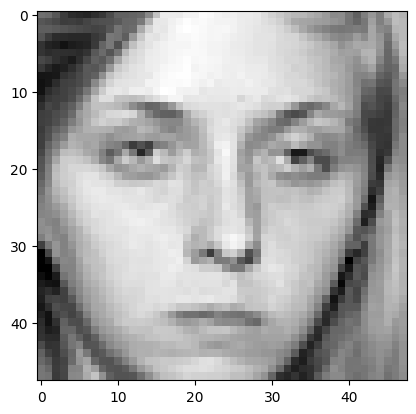

In [29]:
image = "D:\Sem-6\Predictive Analysis/Task Optimizer/data/train/sad/58.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  fear


d:\Sem-6\Predictive Analysis\env\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


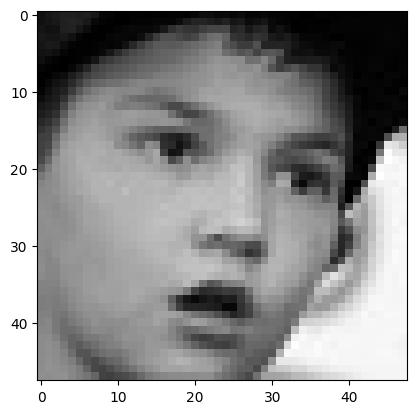

In [33]:
image = "D:\Sem-6\Predictive Analysis/Task Optimizer/data/test/fear/101.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neautral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
model prediction is  neutral


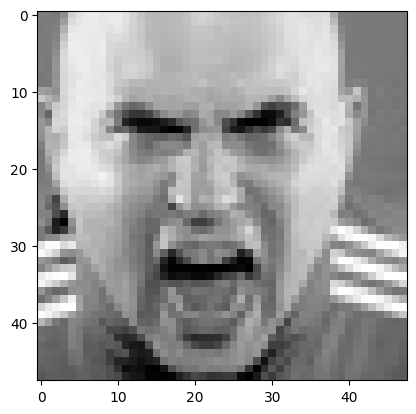

In [26]:
#image = "D:\Sem-6\Predictive Analysis/Task Optimizer/data/test/neutral/217.jpg"
print("original image is of neautral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='grey')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
model prediction is  neutral


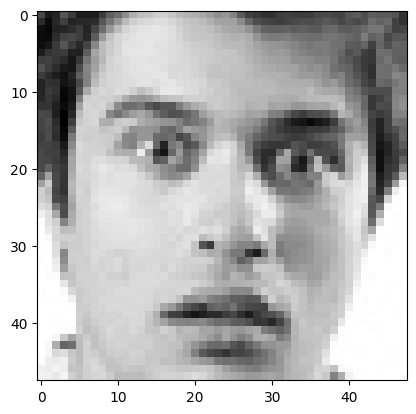

In [28]:
image = "D:/Sem-6/Predictive Analysis/Task Optimizer/data/test/surprise/438.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='grey')